In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 적용을 위한 정리
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [97]:
data = [i*10 for i in range(5)]


In [6]:
sr = pd.Series(['홍길동', '이순신', '김철수', '김순이', '이홍김'])
sr.index = ['aa', 'bb', 'cc', 'dd', 'ee']
sr

aa    홍길동
bb    이순신
cc    김철수
dd    김순이
ee    이홍김
dtype: object

In [7]:
sr[sr=='이순신']

bb    이순신
dtype: object

# 정규식 패턴 매칭
'''
예를 들어 김씨만 추출 or 신으로 끝나는 사람 찾기 등
'''

In [10]:
# str 속성을 통해서 문자열을 string 형식으로 변환
sr.str 

In [13]:
sr.str[1:]

aa    길동
bb    순신
cc    철수
dd    순이
ee    홍김
dtype: object

In [14]:
sr[sr.str[0]=='김']

cc    김철수
dd    김순이
dtype: object

In [15]:
# contains 는 필터링에 많이 쓰임
sr.str.contains

<bound method StringMethods.contains of <pandas.core.strings.accessor.StringMethods object at 0x00000175E4A0CDF0>>

In [16]:
sr.str.contains('김')

aa    False
bb    False
cc     True
dd     True
ee     True
dtype: bool

In [17]:
sr[sr.str.contains('김')]

cc    김철수
dd    김순이
ee    이홍김
dtype: object

In [18]:
sr[sr.str.contains('^김')] # ^(윗꺾세)는 시작을 의미

cc    김철수
dd    김순이
dtype: object

In [19]:
sr[sr.str.contains('김$')] # $는 끝을 의미

ee    이홍김
dtype: object

In [20]:
sr[sr.str.contains('김[철순]')] # [] 문자의 집합중 하나

cc    김철수
dd    김순이
dtype: object

In [21]:
sr[sr.str.contains('순신|철수')] # | 는 or 을 의미

bb    이순신
cc    김철수
dtype: object

In [23]:
# replace 김 -> 황 처럼 특정 글자를 변환 시킴
sr.str.replace('김', '황')

aa    홍길동
bb    이순신
cc    황철수
dd    황순이
ee    이홍황
dtype: object

In [25]:
sr.str.replace('^김', '황')

C:\Users\user\AppData\Local\Temp\ipykernel_11468\2245214265.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sr.str.replace('^김', '황')


aa    홍길동
bb    이순신
cc    황철수
dd    황순이
ee    이홍김
dtype: object

# 7강 시리즈 통계

In [26]:
data = [10, 20, 30, 40, 50]
sr = pd.Series(data, index = ['a','b','c','d','e'], name = 'kor')
sr

a    10
b    20
c    30
d    40
e    50
Name: kor, dtype: int64

In [27]:
sr.max()

50

In [28]:
sr.min()

10

In [29]:
sr.idxmax() # 가장 큰값의 인덱스

'e'

In [30]:
sr.idxmin()

'a'

In [32]:
# 45 이하인 데이터의 가장 큰값은?
sr[sr<=45].max()

40

In [33]:
sr.head(2)

a    10
b    20
Name: kor, dtype: int64

In [34]:
sr.tail(2)

d    40
e    50
Name: kor, dtype: int64

In [41]:
sr.nlargest(3) # n 개 큰 순으로 찾아냄
'''
nlargest(n,keep=)
keep인자의 경우 default 값은 first
last 와 all 을 적용해 사용 가능하다.
'''

e    50
d    40
c    30
Name: kor, dtype: int64

In [44]:
sr.nsmallest(3)

a    10
b    20
c    30
Name: kor, dtype: int64

In [45]:
sr.sum()

150

In [46]:
sr.mean()

30.0

In [47]:
sr.median()

30.0

In [50]:
sr.quantile([0.25, 0.5, 0.75])# 데이터를 정렬했을 때 25%, 50%, 75% 에 해당하는 값

0.25    20.0
0.50    30.0
0.75    40.0
Name: kor, dtype: float64

In [52]:
sr

a    10
b    20
c    30
d    40
e    50
Name: kor, dtype: int64

In [54]:
sr.std() # 표준편차

15.811388300841896

In [55]:
sr.var()

250.0

In [59]:
sr.unique()

array([10, 20, 30, 40, 50], dtype=int64)

In [60]:
sr['b'] = 30

In [61]:
sr.unique() # 각각의 요소를 구할 때 이용

array([10, 30, 40, 50], dtype=int64)

In [62]:
sr.value_counts() # 각 데이터가 몇개씩 있는지?

30    2
10    1
40    1
50    1
Name: kor, dtype: int64

In [64]:
def fn(v):
    print('v=' ,v)
    return v+1

In [66]:
sr.apply(fn) # 각 요소에 함수를 대입함

v= 10
v= 30
v= 30
v= 40
v= 50


a    11
b    31
c    31
d    41
e    51
Name: kor, dtype: int64

In [67]:
def fn2(v):
    print('v=' ,v)
    if v<30:
        return v+1
    else:
        return v+2

In [68]:
sr.apply(fn2)

v= 10
v= 30
v= 30
v= 40
v= 50


a    11
b    32
c    32
d    42
e    52
Name: kor, dtype: int64

In [69]:
sr.map(fn)

v= 10
v= 30
v= 30
v= 40
v= 50


a    11
b    31
c    31
d    41
e    51
Name: kor, dtype: int64

sr.apply = sr.map<br>
이를 활용하는 이유는,<br>
산술연산을 할 때 일괄 적용을 피하기 위해서 사용한다.

In [71]:
sr.apply(lambda v: v+1 if v<30 else v+2) # 람다식으로도 이용가능

a    11
b    32
c    32
d    42
e    52
Name: kor, dtype: int64

In [74]:
'''
0<= sr <20
20<= sr <40
40<= sr <90
'''
pd.cut(sr,[0,20,40,90]) # 각각 항이 어떤 카테고리에 속하는지 요소별로 나눔

a     (0, 20]
b    (20, 40]
c    (20, 40]
d    (20, 40]
e    (40, 90]
Name: kor, dtype: category
Categories (3, interval[int64, right]): [(0, 20] < (20, 40] < (40, 90]]

In [75]:
pd.cut(sr,[0,20,40,90], labels=['C','B','A'])

a    C
b    B
c    B
d    B
e    A
Name: kor, dtype: category
Categories (3, object): ['C' < 'B' < 'A']

In [77]:
pd.cut(sr,[0,20,40,90], labels=['C','B','A']).value_counts() # 특정 범위에 대한 도수를 구할 수 있음

B    3
C    1
A    1
Name: kor, dtype: int64

sr.to_csv # csv 파일로 저장 가능

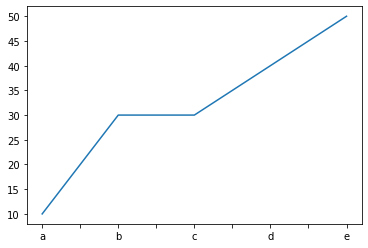

In [82]:
sr.plot()
plt.show() # show를 해야 비디오 메모리로 전송되서 나타낼 수 있음 (주피터에서는 없이도 나오긴 하지만 하는게 좋음)

<AxesSubplot:title={'center':'grade'}>

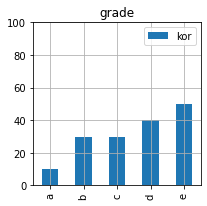

In [89]:
sr.plot(kind='bar', figsize=(3,3), title='grade', grid=True, legend=True, ylim=(0,100))

In [90]:
for n in sr:
    print(n)

10
30
30
40
50


In [91]:
for n in sr.index:
    print(n)

a
b
c
d
e


In [93]:
for n in sr.items():
    print(n)

('a', 10)
('b', 30)
('c', 30)
('d', 40)
('e', 50)


In [94]:
for i,v in sr.items():
    print(i,v)

a 10
b 30
c 30
d 40
e 50
